In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,7,10.0,8.0,NaN,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4,9.0,5.0,7.0,4.0,7.0,7.0,13.0,NaN,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,6.0,NaN
19996,4,7.0,NaN,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4,11.0,4.0,8.0,3.0,0.0,2.0,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	300
float64		column 3	450
float64		column 4	150
float64		column 5	150
float64		column 6	400
float64		column 7	200
float64		column 8	150
float64		column 9	250
float64		column 10	200
float64		column 11	100
float64		column 12	200
float64		column 13	150
float64		column 14	150
float64		column 15	150
float64		column 16	200
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,20000.000000,19700.000000,19550.000000,19850.000000,19850.000000,19600.000000,19800.000000,19850.000000,19750.000000,19800.000000,19900.000000,19800.000000,19850.000000,19850.000000,19850.000000,19800.000000,0.0
mean,4.023550,7.038883,5.119386,5.375466,3.503174,6.899286,7.501818,4.623728,5.180000,8.279949,6.455578,7.930657,3.046045,8.336423,3.693501,7.800556,NaN
std,1.913212,3.294551,2.004003,2.254441,2.183601,2.009000,2.316599,2.690518,2.373085,2.482356,2.624839,2.074157,2.328699,1.543357,2.562723,1.613140,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

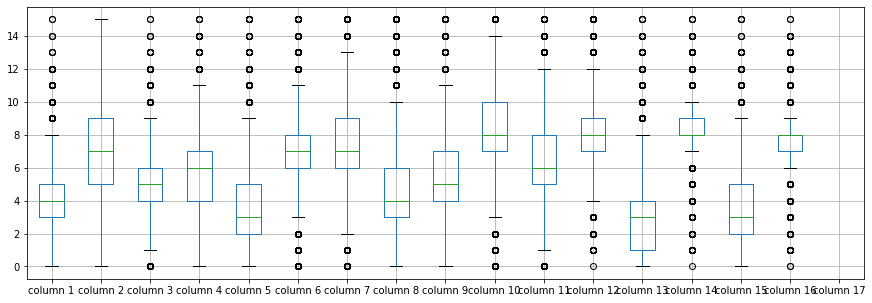

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.023550
column 2     7.038883
column 3     5.119386
column 4     5.375466
column 5     3.503174
column 6     6.899286
column 7     7.501818
column 8     4.623728
column 9     5.180000
column 10    8.279949
column 11    6.455578
column 12    7.930657
column 13    3.046045
column 14    8.336423
column 15    3.693501
column 16    7.800556
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.757161,0.850370,0.671595,0.618096,-0.032424,0.045379,0.014590,0.050873,0.148538,0.034741,-0.045525,0.486931,0.097402,0.273672,-0.105299,NaN
column 2,0.757161,1.000000,0.669086,0.822350,0.552095,0.045587,-0.042614,-0.022215,0.093773,0.156331,-0.055525,-0.006515,0.271335,-0.003771,0.229398,-0.042163,NaN
column 3,0.850370,0.669086,1.000000,0.657342,0.763953,0.061426,0.022092,-0.097043,0.056942,0.113989,0.011591,-0.042040,0.554508,0.042379,0.257294,-0.117866,NaN
column 4,0.671595,0.822350,0.657342,1.000000,0.641364,0.043394,-0.019972,0.083617,0.056420,0.010453,-0.011416,0.028241,0.262386,0.024328,0.295775,-0.017376,NaN
column 5,0.618096,0.552095,0.763953,0.641364,1.000000,0.138020,-0.028872,-0.011217,-0.067014,-0.069523,-0.072128,-0.039259,0.625660,0.014848,0.490771,-0.064215,NaN
column 6,-0.032424,0.045587,0.061426,0.043394,0.138020,1.000000,-0.355502,-0.052182,-0.121797,0.081144,-0.341638,-0.035043,0.143691,-0.250187,0.124668,0.248442,NaN
column 7,0.045379,-0.042614,0.022092,-0.019972,-0.028872,-0.355502,1.000000,-0.118301,-0.049016,0.176942,0.599541,-0.267618,-0.035987,0.553278,-0.077666,-0.207172,NaN
column 8,0.014590,-0.022215,-0.097043,0.083617,-0.011217,-0.052182,-0.118301,1.000000,-0.187074,-0.316947,0.041305,0.081189,0.141214,-0.082651,0.008429,0.180665,NaN
column 9,0.050873,0.093773,0.056942,0.056420,-0.067014,-0.121797,-0.049016,-0.187074,1.000000,0.132368,-0.060712,0.118666,-0.384729,-0.050942,0.275399,-0.061519,NaN
column 10,0.148538,0.156331,0.113989,0.010453,-0.069523,0.081144,0.176942,-0.316947,0.132368,1.000000,0.056272,-0.105840,-0.176252,0.029589,-0.088856,-0.114267,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+2,17+2+2,17+2+2+2,17+2+2,17+2,17], vae_layer = False, seed = 20)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 78.9156151611328
Epoch: 1 , loss: 50.914551037597654
Epoch: 2 , loss: 46.31972424316406
Epoch: 3 , loss: 44.50064663391113
Epoch: 4 , loss: 43.48481936340332
Epoch: 5 , loss: 42.54615498046875
Epoch: 6 , loss: 42.267359115600584
Epoch: 7 , loss: 42.16754855194092
Epoch: 8 , loss: 41.862056967163085
Epoch: 9 , loss: 41.72041487121582
Epoch: 10 , loss: 41.56571531677246
Epoch: 11 , loss: 41.515993551635745
Epoch: 12 , loss: 41.28480852661133
Epoch: 13 , loss: 41.14324066772461
Epoch: 14 , loss: 41.07136519622803
Epoch: 15 , loss: 41.09647344818115
Epoch: 16 , loss: 41.06935517883301
Epoch: 17 , loss: 40.937029020690915
Epoch: 18 , loss: 40.86916068878174
Epoch: 19 , loss: 40.85373003845215
Epoch: 20 , loss: 40.870604296875
Epoch: 21 , loss: 40.78169217834473
Epoch: 22 , loss: 40.7194229095459
Epoch: 23 , loss: 40.54055134582519
Epoch: 24 , loss: 40.623405570983884
Epoch: 25 , loss: 40.35323513793945
Epoc

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17   -0.002697
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0,0.0,0.000000,-3.586584,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,5.935623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19996,0,0.0,-2.260287,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19997,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19998,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

176.14724521619257

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.0471761934091703

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.000545
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2,4.0,4.000000,3.000000,2.0,7.000000,8.0,2.0,9.000000,11.0,7.0,7.0,1.0,8.0,5.0,6.0,-0.004242
1,4,7.0,5.000000,5.000000,5.0,5.000000,9.0,6.0,4.000000,8.0,7.0,9.0,2.0,9.0,7.0,10.0,-0.003406
2,7,10.0,8.000000,3.413416,4.0,8.000000,8.0,5.0,10.000000,11.0,2.0,8.0,2.0,5.0,5.0,10.0,-0.002002
3,4,9.0,5.000000,7.000000,4.0,7.000000,7.0,13.0,6.935623,7.0,6.0,8.0,3.0,8.0,0.0,8.0,-0.003311
4,6,7.0,8.000000,5.000000,4.0,7.000000,6.0,3.0,7.000000,10.0,7.0,9.0,3.0,8.0,3.0,7.0,-0.004597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,10.0,5.000000,8.000000,3.0,4.000000,10.0,7.0,8.000000,12.0,10.0,9.0,2.0,9.0,2.0,6.0,-0.004346
19996,4,7.0,3.739713,5.000000,3.0,7.000000,8.0,2.0,10.000000,12.0,6.0,8.0,1.0,9.0,6.0,8.0,-0.001922
19997,4,8.0,4.000000,6.000000,4.0,7.000000,8.0,7.0,4.000000,10.0,7.0,6.0,3.0,9.0,3.0,7.0,-0.001317
19998,4,11.0,4.000000,8.000000,3.0,0.000000,2.0,4.0,6.000000,1.0,0.0,7.0,0.0,8.0,0.0,8.0,-0.003271


In [21]:
imputations[-1].to_excel("Letter_NW_1(imp).xlsx", index=False, header=False)